<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

Na web, podemos conseguir um volume enorme de material de estudo e também um conjunto bastante variado de datasets, para praticar e desenvolver nossos conhecimentos.

* UCI Machine Learning Repository - https://archive.ics.uci.edu/ml/datasets.html

O UCI Machine Learning Repository é uma coleção de bancos de dados que são usados pela comunidade de aprendizado de máquina para a análise empírica. Atualmente, disponibiliza mais de 460 datasets categorizados. É uma excelente fonte de dados para estudos.

* Kaggle - https://www.kaggle.com

O Kaggle é uma comunidade online focada em data science e machine learning. Além de promover competições sobre estes temas, é uma ótima fonte de dados para treinamento em data science.

* Portal Brasileiro de Dados Abertos - http://dados.gov.br/

O Portal Brasileiro de Dados Abertos é uma ferramenta que disponibiliza dados e informações públicas. É possível encontrar dados de diversas instituições e para vários setores da economia.

* IBGE - https://www.ibge.gov.br

O IBGE mantém um amplo conjunto de dados sobre diversas áreas da economia brasileira. Disponibiliza também informações georreferenciadas.

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [1]:
import matplotlib.pyplot as plt
import pandas            as pd
import numpy             as np

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

In [2]:
import warnings

# para não ver mensagens de alerta
# warnings.filterwarnings('ignore')

# ou para ver uma só vez, depois não verá mais
warnings.filterwarnings(action='once')

In [3]:
import seaborn as sns

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [4]:
df_cerveja = pd.read_csv('../Dados/Consumo_cerveja.csv', sep=';')

# Outra forma possível
df_cerveja = pd.read_table('../Dados/Consumo_cerveja.csv', sep=';')

## Visualizar os dados

In [5]:
df_cerveja.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


## Verificando o tamanho do dataset

In [6]:
df_cerveja.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [7]:
df_cerveja.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [8]:
# Correlação de Pearson
df_cerveja.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


* O consumo possui forte correlação com o atributo temp_max, indicando que quanto maior seja a temperatura máxima, maior o consumo de cerveja.
* Quando chove a tendencia de consumo é diminuir, correlação negativa.
* Em modelos de regressão linear, é importante que as variáveis explicativas (X's) não tenham forte correlação entre si.

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

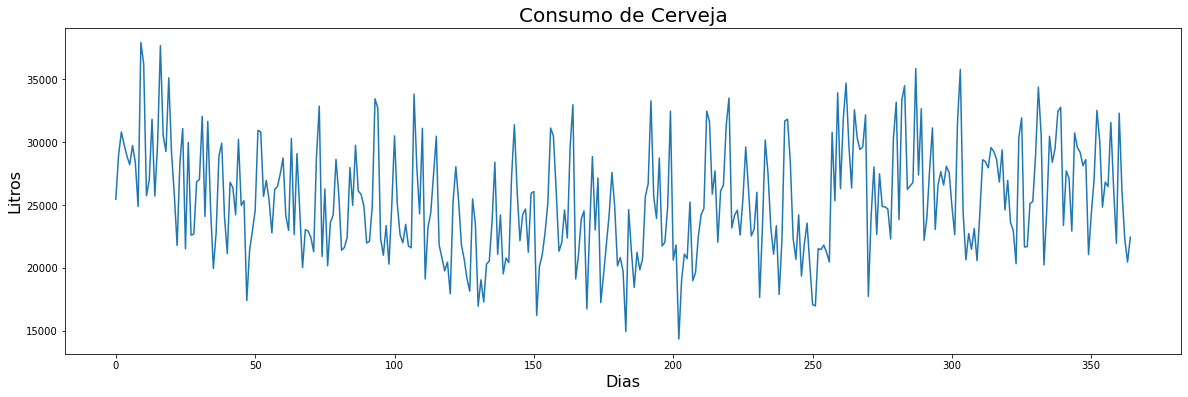

In [9]:
# Visualização do consumo de cerveja ao longo do ano
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros'           , fontsize=16)
ax.set_xlabel('Dias'             , fontsize=16)

ax = df_cerveja['consumo'].plot()

## Plotando a variável independente (x) - Temperatura Máxima

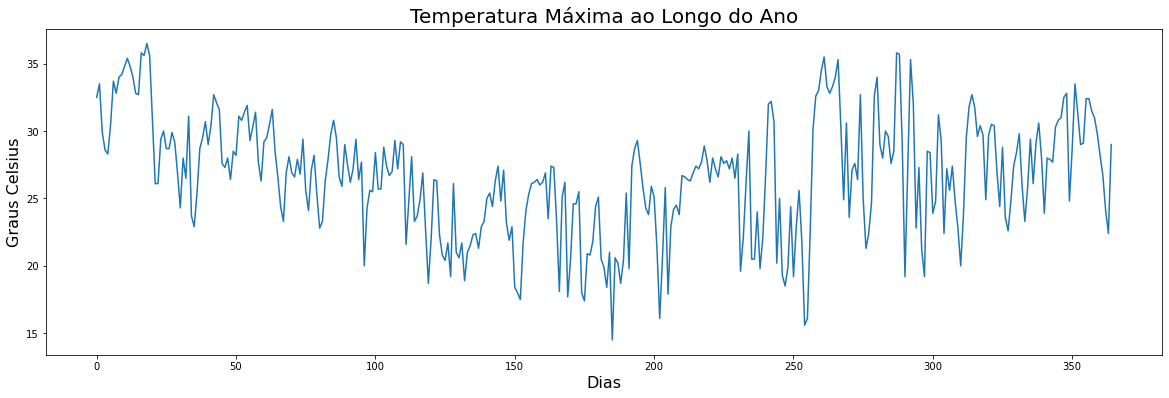

In [10]:
# Visualização da Temperatura Máxima ao longo do ano
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Temperatura Máxima ao Longo do Ano', fontsize=20)
ax.set_ylabel('Graus Celsius'                    , fontsize=16)
ax.set_xlabel('Dias'                             , fontsize=16)

ax = df_cerveja['temp_max'].plot()

# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

## Box plot da variável *dependente* (y)
Duas das principais características de um box plot é a possibilidade de identificar a simetria ou assimetria (figura abaixo) do conjunto de dados e a presença de outliers.</br><br/>
<img width='600px' src='https://caelum-online-public.s3.amazonaws.com/860-data-science-modelo-regressao-linear/02/prh0vAC.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<AxesSubplot:title={'center':'Consumo de Cerveja'}, xlabel='Litros'>

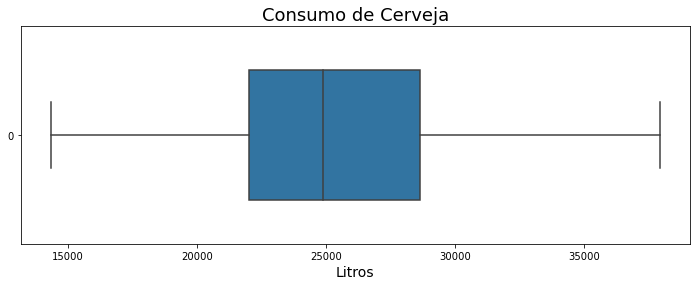

In [11]:
ax = sns.boxplot(data = df_cerveja['consumo'], orient = 'h', width=0.6)
ax.figure.set_size_inches(12, 4)
ax.set_title('Consumo de Cerveja', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

In [12]:
def gera_box_plot():
    ax = sns.boxplot(x='consumo', y='fds', data=df_cerveja, orient='h', width=0.5)
    ax.figure.set_size_inches(12, 4)
    ax.set_title('Consumo de Cerveja', fontsize=18)
    ax.set_xlabel('Litros', fontsize=14)
    ax.set_ylabel('Final de Semana'  , fontsize=14)
    ax

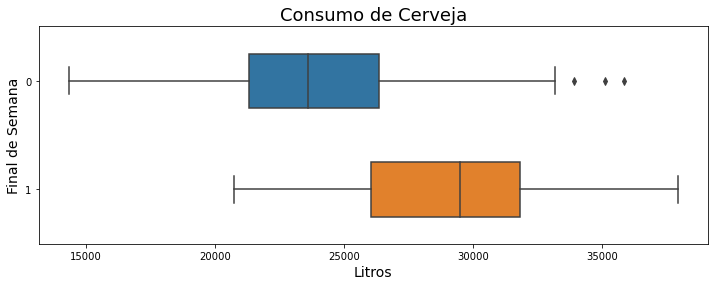

In [13]:
gera_box_plot()

## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

* Lista completa de todos os valores de style que você pode escolher:</br>
darkgrid, whitegrid, dark, white, and ticks
|style|
|---|
|darkgrid|
|whitegrid|
|dark|
|white|
|ticks|

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

* Lista completa de todos os valores da paleta que você pode escolher:</br>
|Paleta|Paleta|Paleta|Paleta|Paleta|Paleta|Paleta|Paleta|Paleta|Paleta|
|---|---|---|---|---|---|---|---|---|---|
|Accent|Accent_r|Blues|Blues_r|BrBG|BrBG_r|BuGn|BuGn_r|BuPu|BuPu_r|
|CMRmap|CMRmap_r|Dark2|Dark2_r|GnBu|GnBu_r|Greens|Greens_r|Greys|Greys_r|
|OrRd|OrRd_r|Oranges|Oranges_r|PRGn|PRGn_r|Paired|Paired_r|Pastel1|Pastel1_r|
|Pastel2|Pastel2_r|PiYG|PiYG_r|PuBu|PuBuGn|PuBuGn_r|PuBu_r|PuOr|PuOr_r|
|PuRd|PuRd_r|Purples|Purples_r|RdBu|RdBu_r|RdGy|RdGy_r|RdPu|RdPu_r|
|RdYlBu|RdYlBu_r|RdYlGn|RdYlGn_r|Reds|Reds_r|Set1|Set1_r|Set2|Set2_r|
|Set3|Set3_r|Spectral|Spectral_r|Wistia|Wistia_r|YlGn|YlGnBu|YlGnBu_r|YlGn_r|
|YlOrBr|YlOrBr_r|YlOrRd|YlOrRd_r|afmhot|afmhot_r|autumn|autumn_r|binary|binary_r|
|bone|bone_r|brg|brg_r|bwr|bwr_r|cividis|cividis_r|cool|cool_r|
|coolwarm|coolwarm_r|copper|copper_r|cubehelix|cubehelix_r|flag|flag_r|gist_earth|gist_earth_r|
|gist_gray|gist_gray_r|gist_heat|gist_heat_r|gist_ncar|gist_ncar_r|gist_rainbow|gist_rainbow_r|gist_stern|gist_stern_r|
|gist_yarg|gist_yarg_r|gnuplot|gnuplot2|gnuplot2_r|gnuplot_r|gray|gray_r|hot|hot_r|
|hsv|hsv_r|icefire|icefire_r|inferno|inferno_r|magma|magma_r|mako|mako_r|
|nipy_spectral|nipy_spectral_r|ocean|ocean_r|pink|pink_r|plasma|plasma_r|prism|prism_r|
|rainbow|rainbow_r|rocket|rocket_r|seismic|seismic_r|spring|spring_r|summer|summer_r|
|tab10|tab10_r|tab20|tab20_r|tab20b|tab20b_r|tab20c|tab20c_r|terrain|terrain_r|
|twilight|twilight_r|twilight_shifted|twilight_shifted_r|viridis|viridis_r|vlag|vlag_r|winter|winter_r|

In [14]:
# style => darkgrid, whitegrid, dark, white, and ticks
sns.set_style('darkgrid')

# palette => configurando como coolwarm
sns.set_palette('Set2')

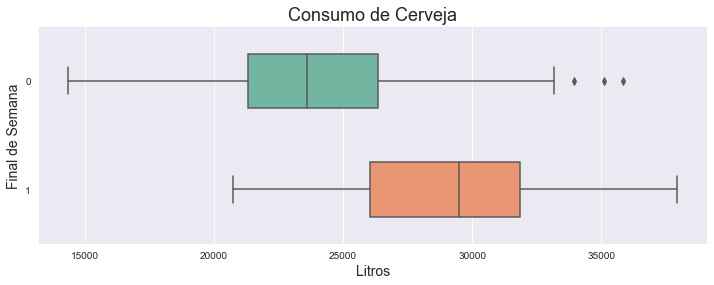

In [15]:
# Exatamente o mesmo comando para demonstrar diferença
gera_box_plot()

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot
https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot
https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot

C:\Users\renat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequencia'}, xlabel='Consumo', ylabel='Consumo de Cerveja (Litros)'>

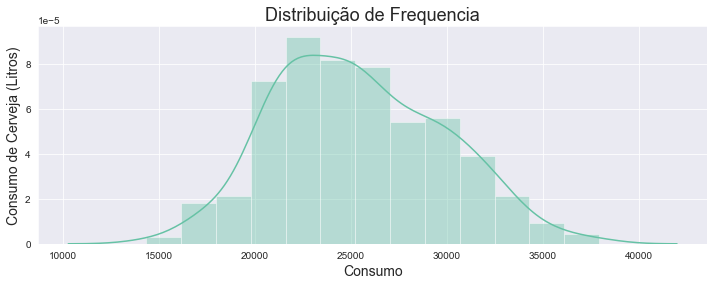

In [16]:
ax = sns.distplot(df_cerveja['consumo'])
ax.figure.set_size_inches(12, 4)
ax.set_title('Distribuição de Frequencia', fontsize=18)
ax.set_xlabel('Consumo', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (Litros)', fontsize=14)
ax

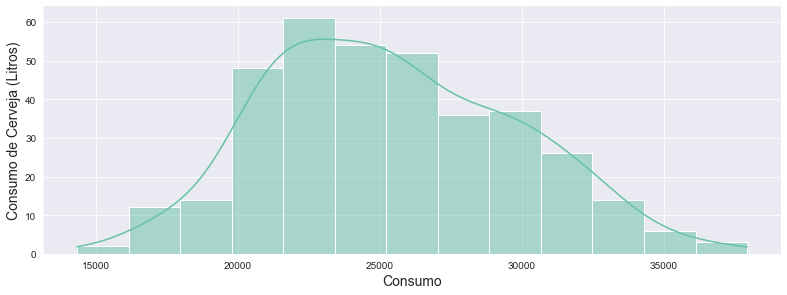

In [17]:
ax = sns.displot(df_cerveja['consumo'], kde=True)
ax.figure.set_size_inches(12, 4)
ax.set_axis_labels('Consumo', 'Consumo de Cerveja (Litros)' , fontsize=14)
ax

<AxesSubplot:xlabel='consumo', ylabel='Count'>

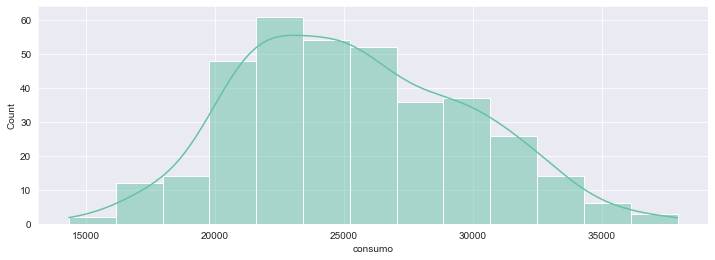

In [18]:
ax = sns.histplot(df_cerveja['consumo'], kde=True)
ax.figure.set_size_inches(12, 4)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

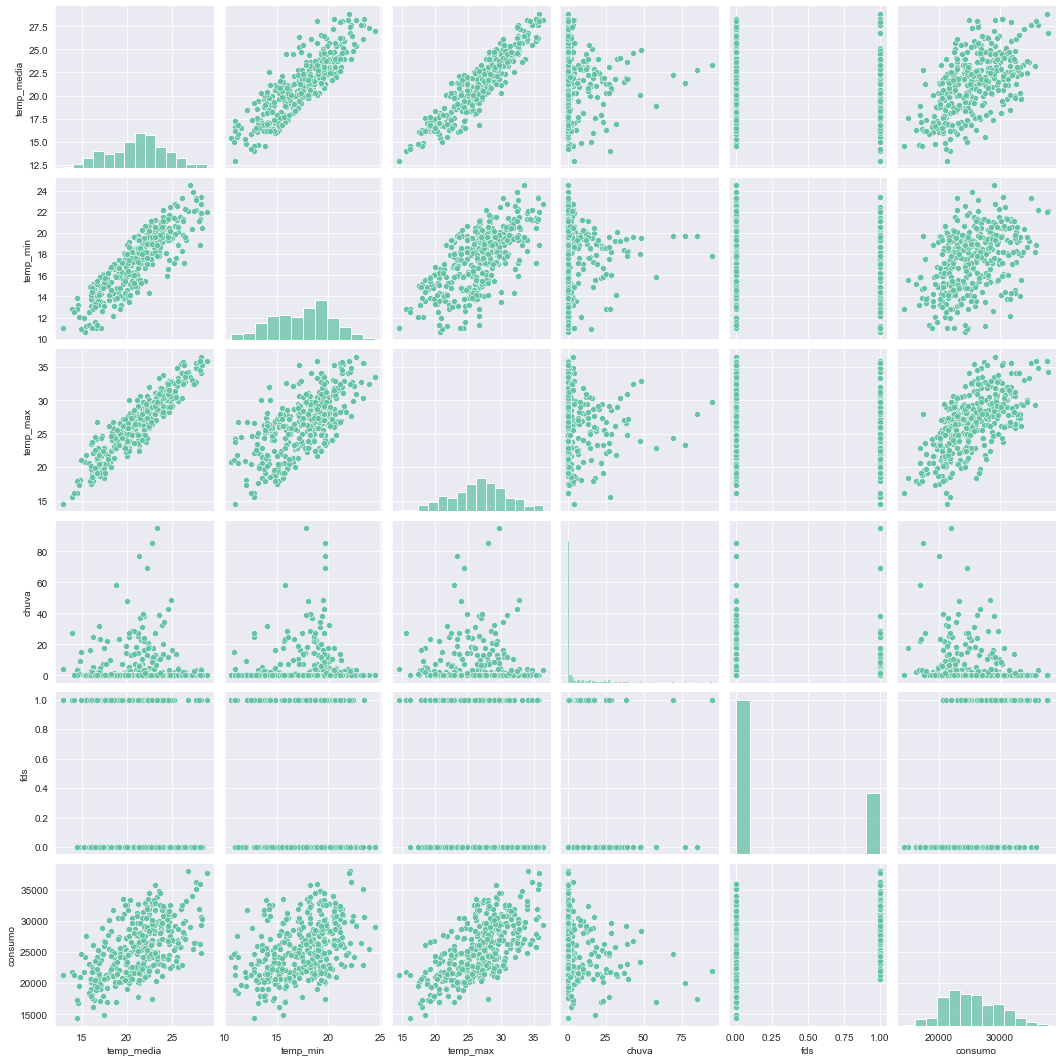

In [19]:
sns.pairplot(df_cerveja)

## Plotando o pairplot fixando somente uma variável no eixo y

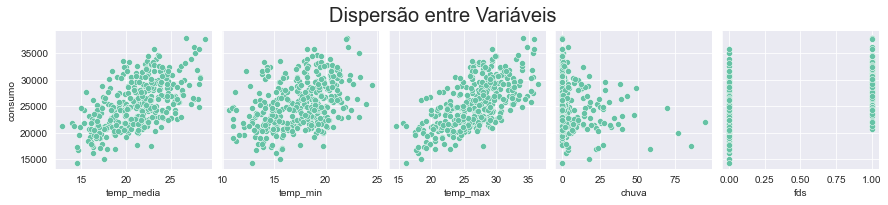

In [20]:
ax =sns.pairplot(df_cerveja, y_vars='consumo', x_vars=['temp_media', 'temp_min', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre Variáveis', fontsize=20, y=1.1)
ax

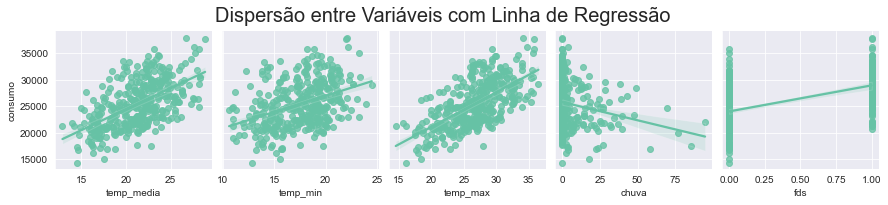

In [21]:
ax = sns.pairplot(df_cerveja, x_vars=['temp_media', 'temp_min', 'temp_max', 'chuva', 'fds'], y_vars=["consumo"], kind="reg");
ax.fig.suptitle('Dispersão entre Variáveis com Linha de Regressão', fontsize=20, y=1.1)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

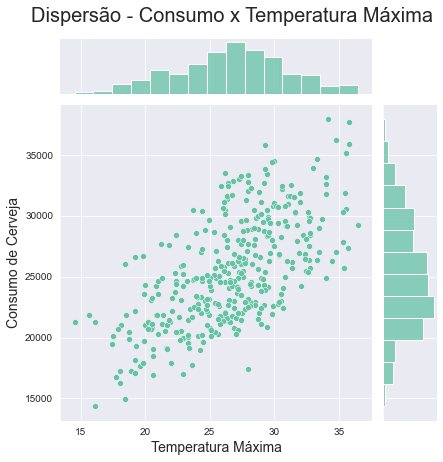

In [22]:
ax = sns.jointplot(data=df_cerveja, x='temp_max', y='consumo');
ax.fig.suptitle('Dispersão - Consumo x Temperatura Máxima', fontsize=20, y=1.05)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize=14)
ax

## Plotando um jointplot com a reta de regressão estimada

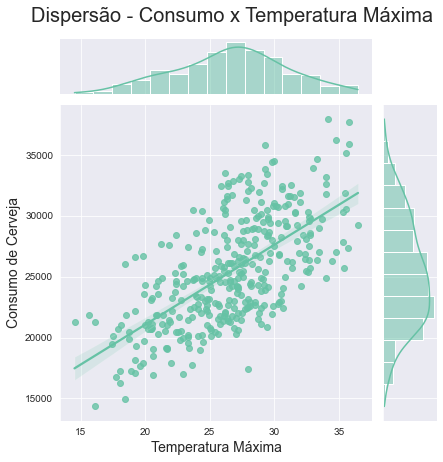

In [23]:
ax = sns.jointplot(data=df_cerveja, x='temp_max', y='consumo', kind='reg');
ax.fig.suptitle('Dispersão - Consumo x Temperatura Máxima', fontsize=20, y=1.05)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

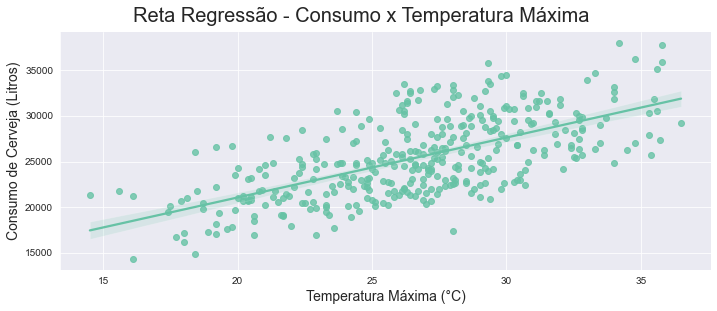

In [24]:
ax = sns.lmplot(data=df_cerveja, x='temp_max', y='consumo', height=4, aspect=2.5);
ax.fig.suptitle('Reta Regressão - Consumo x Temperatura Máxima', fontsize=20, y=1.05)
ax.set_xlabels('Temperatura Máxima (°C)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (Litros)', fontsize=14)
ax

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

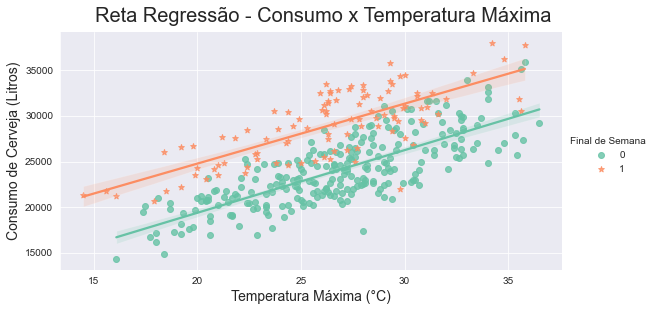

In [25]:
ax = sns.lmplot(data=df_cerveja, x='temp_max', y='consumo', height=4, aspect=2., hue='fds', markers=['o', '*'], legend=False);
ax.fig.suptitle('Reta Regressão - Consumo x Temperatura Máxima', fontsize=20, y=1.05)
ax.set_xlabels('Temperatura Máxima (°C)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (Litros)', fontsize=14)
ax.add_legend(title='Final de Semana')
ax

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

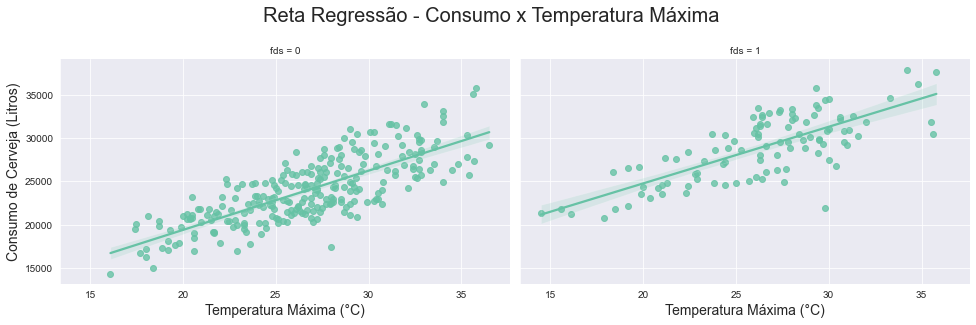

In [26]:
ax = sns.lmplot(data=df_cerveja, x='temp_max', y='consumo', height=4, aspect=1.7, col='fds');
ax.fig.suptitle('Reta Regressão - Consumo x Temperatura Máxima', fontsize=20, y=1.1)
ax.set_xlabels('Temperatura Máxima (°C)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (Litros)', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [27]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [28]:
y = df_cerveja['consumo']
y.head()

0    25461
1    28972
2    30814
3    29799
4    28900
Name: consumo, dtype: int64

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [29]:
X = df_cerveja[['temp_max', 'chuva', 'fds']]
X.head()

,temp_max,chuva,fds
0,32.5,0.0,0
1,33.5,0.0,0
2,29.9,0.0,1
3,28.6,1.2,1
4,28.3,0.0,0


## Criando os datasets de treino e de teste

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2811)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [31]:
X_train.shape

(255, 3)

In [32]:
X_test.shape

(110, 3)

In [33]:
y_train.shape

(255,)

In [34]:
y_test.shape

(110,)

In [35]:
df_cerveja.shape

(365, 7)

<img width='600px' src='../Dados/img/reg_01.jpg'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn              import metrics

## Instanciando a classe *LinearRegression()*

In [37]:
modelo_reg = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [38]:
modelo_reg.fit(X=X_train, y=y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [39]:
# ² - alt + 1021
# R² é um valor entra 0 e 1
# Enquanto mais próximo de 1 melhor
print(f'R² = {modelo_reg.score(X_train, y_train).round(2)}')

R² = 0.73


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [40]:
y_previsto = modelo_reg.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [41]:
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

R² = 0.69


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [42]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [43]:
previsao = modelo_reg.predict(entrada)[0]
print(f'Consumo previsto de {previsao:.2f} litros.')

Consumo previsto de 26094.90 litros.


## Criando um simulador simples

In [44]:
entrada_temp_max = entrada.iloc[0]['temp_max']
entrada_chuva    = entrada.iloc[0]['chuva']
entrada_fds      = entrada.iloc[0]['fds']

print(f'temp_max - {entrada_temp_max}')
print(f'chuva    - {entrada_chuva}')
print(f'fds      - {entrada_fds}')

temp_max - 30.5
chuva    - 12.2
fds      - 0.0


In [45]:
entrada = [[entrada_temp_max, entrada_chuva, entrada_fds]]
entrada

[[30.5, 12.2, 0.0]]

In [46]:
previsao = modelo_reg.predict(entrada)[0]
print(f'Consumo previsto de {previsao:.2f} litros.')

Consumo previsto de 26094.90 litros.


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='../Dados/img/reg_02.jpg'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [50]:
intercepto = modelo_reg.intercept_
intercepto

5951.976339312445

In [52]:
type(intercepto)

numpy.float64

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [51]:
coeficientes = modelo_reg.coef_
coeficientes

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [53]:
type(coeficientes)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [54]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [55]:
index=['intercepto', 'temp_max', 'chuva', 'fds']
index

['intercepto', 'temp_max', 'chuva', 'fds']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [61]:
np.append(intercepto, coeficientes)

array([5951.97633931,  684.73675898,  -60.7824355 , 5401.08333866])

In [59]:
pd.DataFrame(data=np.append(intercepto, coeficientes), index= index, columns=['Parâmetros']).T

,intercepto,temp_max,chuva,fds
Parâmetros,5951.976339,684.736759,-60.782435,5401.083339


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [62]:
y_previsto_train = modelo_reg.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<AxesSubplot:title={'center':'Previsto x Valor Real'}, xlabel='Consumo de Cerveja (Litros) - Previsão', ylabel='Consumo de Cerveja (Litros) - Real'>

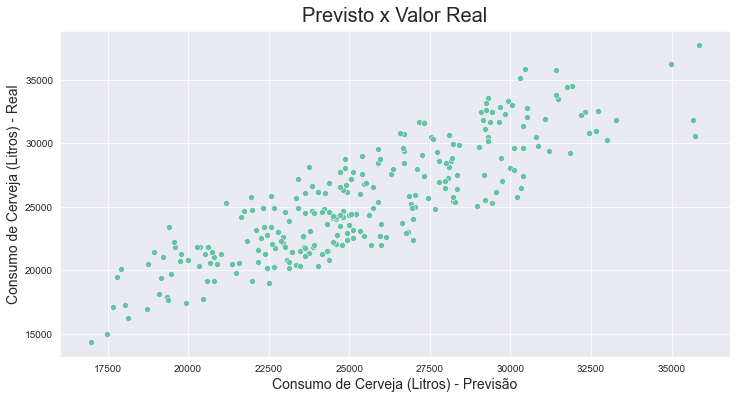

In [68]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsto x Valor Real', fontsize=20, y=1.01)
ax.set_xlabel('Consumo de Cerveja (Litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (Litros) - Real', fontsize=14)
ax

## Obtendo os resíduos

In [70]:
residuos = y_train - y_previsto_train
residuos[:5]

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
Name: consumo, dtype: float64

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)</br>
Esperado média zero</br>
Visualização da variação</br>

<AxesSubplot:title={'center':'Previsto x Valor Real'}, xlabel='Consumo de Cerveja (Litros) - Previsão', ylabel='Consumo de Cerveja (Litros) - Real'>

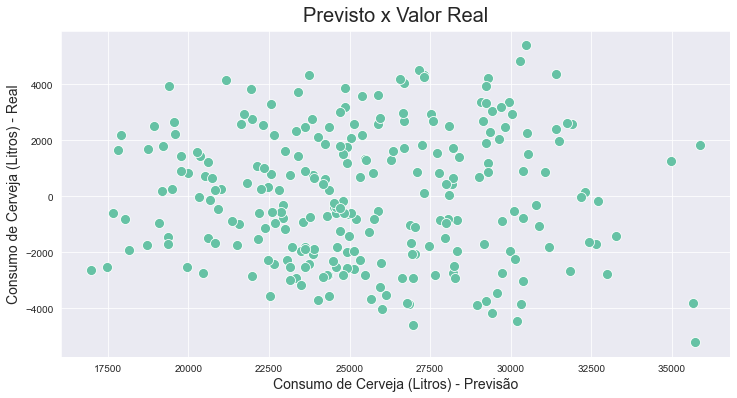

In [71]:
ax = sns.scatterplot(x=y_previsto_train, y=residuos, s=100)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsto x Valor Real', fontsize=20, y=1.01)
ax.set_xlabel('Consumo de Cerveja (Litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (Litros) - Real', fontsize=14)
ax

## Utilizando os resíduos ao quadrado

<img width='800px' src='../Dados/img/var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

<AxesSubplot:title={'center':'Previsto x Valor Real'}, xlabel='Consumo de Cerveja (Litros) - Previsão', ylabel='Consumo de Cerveja (Litros) - Real'>

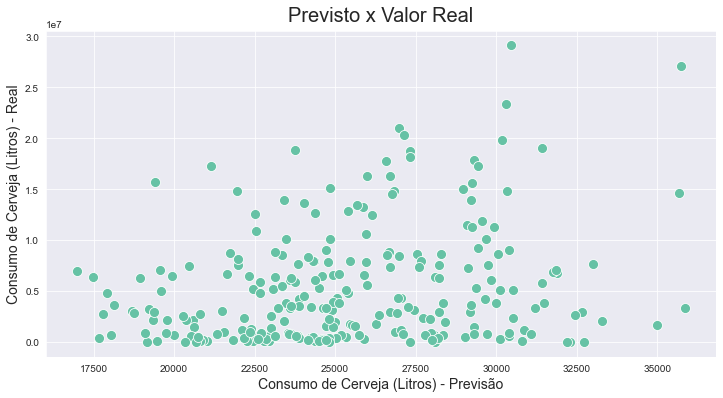

In [72]:
ax = sns.scatterplot(x=y_previsto_train, y=residuos**2, s=100)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsto x Valor Real', fontsize=20, y=1.01)
ax.set_xlabel('Consumo de Cerveja (Litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (Litros) - Real', fontsize=14)
ax

## Plotando a distribuição de frequências dos resíduos

<AxesSubplot:title={'center':'Distribuição de Frequencia dos Resíduos'}, xlabel='Consumo de Cerveja (Litros) - Previsão', ylabel='Count'>

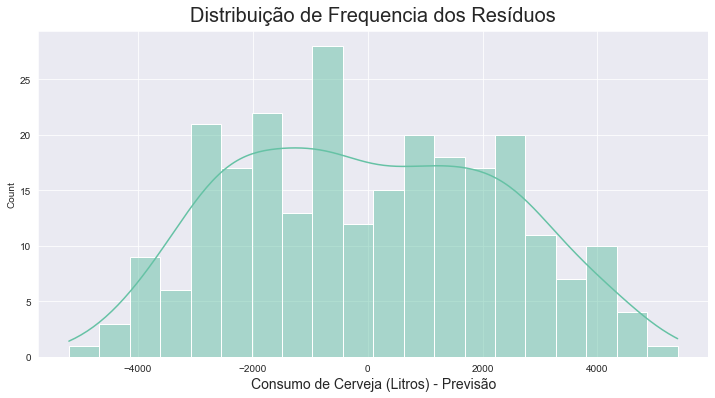

In [81]:
ax = sns.histplot(residuos, bins=20, kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequencia dos Resíduos', fontsize=20, y=1.01)
ax.set_xlabel('Consumo de Cerveja (Litros) - Previsão', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [87]:
print(f"Todas as variáveis do nosso DataFrame: {', '.join(df_cerveja.columns)}")

Todas as variáveis do nosso DataFrame: data, temp_media, temp_min, temp_max, chuva, fds, consumo


In [88]:
X2 = df_cerveja[['temp_media', 'chuva', 'fds']]
X2.head()

,temp_media,chuva,fds
0,27.30,0.0,0
1,27.02,0.0,0
2,24.82,0.0,1
3,23.98,1.2,1
4,23.82,0.0,0


## Criando os datasets de treino e de teste

In [89]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [91]:
modelo_reg2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [92]:
modelo_reg2.fit(X2_train, y2_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [97]:
print('Modelo com Temperatura Máxima')
print(f'R² = {modelo_reg.score(X_train, y_train).round(2)}')

Modelo com Temperatura Máxima
R² = 0.73


In [96]:
print('Modelo com Temperatura Média')
print(f'R² = {modelo_reg2.score(X2_train, y2_train).round(2)}')

Modelo com Temperatura Média
R² = 0.66


<font color='red'>Enquanto mais próximo de 1 melhor o modelo, portanto o modelo com temperatura máxima é melhor do que com o modelo com temperatura média.</font>

## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [104]:
y_previsto  = modelo_reg.predict(X_test)
y2_previsto = modelo_reg2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [108]:
print('Modelo com Temperatura Máxima')
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

Modelo com Temperatura Máxima
R² = 0.69


In [109]:
print('Modelo com Temperatura Média')
print(f'R² = {metrics.r2_score(y2_test, y2_previsto).round(2)}')

Modelo com Temperatura Média
R² = 0.66


<font color='red'>Na base de treino o score ficou mais próximo, mas o modelo com temperatura máxima continua melhor do que o modelo com temperatura média.</font>

# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [117]:
# mse - Mean Squared Error - Erro Quadrático Médio
mse = metrics.mean_squared_error(y2_test, y2_previsto).round(2)
mse

6060775.46

In [118]:
# rmse - Root Mean Squared Error - Raiz do Erro Quadrático Médio 

rmse = np.sqrt(mse).round(2)
rmse

2461.86

In [119]:
r2 = metrics.r2_score(y2_test, y2_previsto).round(2)
r2

0.66

In [120]:
pd.DataFrame([mse, rmse, r2], index=['Erro Quadrático Médio', 'Raiz do Erro Quadrático Médio', 'R²'], columns=['Métricas'])

,Métricas
Erro Quadrático Médio,6060775.46
Raiz do Erro Quadrático Médio,2461.86
R²,0.66


## Obtendo métricas para o modelo com Temperatura Máxima

In [121]:
mse = metrics.mean_squared_error(y_test, y_previsto).round(2)
rmse = np.sqrt(mse).round(2)
r2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([mse, rmse, r2], index=['Erro Quadrático Médio', 'Raiz do Erro Quadrático Médio', 'R²'], columns=['Métricas'])

,Métricas
Erro Quadrático Médio,5471976.38
Raiz do Erro Quadrático Médio,2339.23
R²,0.69


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [125]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [127]:
modelo_reg.predict(entrada)[0]

26094.901775262017

## Criando um simulador simples

In [139]:
', '.join(df_cerveja.columns)

'data, temp_media, temp_min, temp_max, chuva, fds, consumo'

In [138]:
temp_max = X_test.iloc[0]['temp_max']
chuva    = X_test.iloc[0]['chuva']
fds      = X_test.iloc[0]['fds']

entrada  = [[temp_max, chuva, fds]]
print(f'Consumo previsto de cerveja é de {modelo_reg.predict(entrada).round(2)[0]} litros.')

Consumo previsto de cerveja é de 26094.9 litros.


## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    O módulo pickle implementa protocolos binários para serializar <b>pickle.dump()</b> e desserializar <b>pickle.load()</b> a estrutura de um objeto Python.
</p>

In [140]:
import pickle

In [143]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo_reg, output)
output.close()

C:\Users\renat\AppData\Local\Temp/ipykernel_9316/3434635000.py:1: ResourceWarning: unclosed file <_io.BufferedWriter name='modelo_consumo_cerveja'>
  output = open('modelo_consumo_cerveja', 'wb')


### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```